In [1]:
import pickle
import os 
from itertools import product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

from pycgp import single_mutation, point_mutation, probabilistic_mutation
from pycgp.gems import MatchByActiveStrategy, MatchPMStrategy, MatchSMStrategy

from utils import load_data, aggregate_statistics, plot_fitnesses, plot_distributions

This notebook interpret the results of simple binary classification task.

# Aggregate statistics

In [2]:
mutations = [
        (single_mutation, MatchSMStrategy),
        (point_mutation, MatchPMStrategy),
        (probabilistic_mutation, MatchSMStrategy),
        (single_mutation, MatchByActiveStrategy),
        (probabilistic_mutation, MatchByActiveStrategy)]

folder = 'scripts/bin_class_out_10_pops//'
data = aggregate_statistics(folder, mutations, has_test_error=True)
data.head()

,mutation,strategy,gems,columns,best,mean,std,avg_gem_count,gem_better,gem_worse,test_error,bf,mf
0,single_mutation,MatchSMStrategy,0,10,-0.894724,-0.644410,0.182541,0.00,0.00,0.00,-0.912281,"[-0.6479899497487435, -0.6606783919597987, -0....","[-0.625188442211055, -0.6243090452261304, -0.6..."
1,single_mutation,MatchSMStrategy,0,50,-0.931030,-0.702261,0.220189,0.00,0.00,0.00,-0.918129,"[-0.6298994974874369, -0.6434673366834168, -0....","[-0.6201633165829142, -0.6198492462311557, -0...."
2,single_mutation,MatchSMStrategy,0,100,-0.934925,-0.729334,0.212652,0.00,0.00,0.00,-0.953216,"[-0.651005025125628, -0.6736180904522612, -0.6...","[-0.5891959798994972, -0.6095477386934672, -0...."
3,single_mutation,MatchSMStrategy,5,10,-0.898744,-0.609673,0.170203,4.95,19.65,18.85,-0.900585,"[-0.6256281407035174, -0.6256281407035174, -0....","[-0.625188442211055, -0.6247487437185927, -0.6..."
4,single_mutation,MatchSMStrategy,5,50,-0.918593,-0.663631,0.193752,4.90,8.55,16.25,-0.964912,"[-0.6277638190954772, -0.6402010050251254, -0....","[-0.6081030150753768, -0.6229271356783916, -0...."


In [3]:
data.groupby('gems').mean()

,best,mean,std,avg_gem_count,gem_better,gem_worse,test_error
gems,,,,,,,
0,-0.918434,-0.706579,0.178136,0.000000,0.000000,0.000000,-0.926706
5,-0.918559,-0.696499,0.174559,6.273333,25.440000,91.296667,-0.928655
10,-0.919196,-0.697245,0.174518,8.560000,33.366667,101.596667,-0.925146


Overall, runs with gems were able to provide better performance, both on training and test data (columns `best` and `test_error`), with larger mean and smaller standard deviation, indicating more stable results. Concerning observation is large number of gem applications, which resulted in worse fitness (`gem_worse` column).

Let's have a look at performance according to different types of mutation and match strategy:

In [4]:
data.groupby(['mutation', 'strategy']).mean()

best      mean       std  \
mutation               strategy                                              
point_mutation         MatchPMStrategy       -0.955891 -0.837094 -0.795351   
probabilistic_mutation MatchByActiveStrategy -0.951703 -0.659394 -0.615371   
                       MatchSMStrategy       -0.951145 -0.649835 -0.602161   
single_mutation        MatchByActiveStrategy -0.959241 -0.700307 -0.365497   
                       MatchSMStrategy       -0.960916 -0.711725 -0.324621   

                                              avg_gem_count  gem_better  \
mutation               strategy                                           
point_mutation         MatchPMStrategy             4.488889   51.066667   
probabilistic_mutation MatchByActiveStrategy       4.994444    5.416667   
                       MatchSMStrategy             3.961111    0.116667   
single_mutation        MatchByActiveStrategy       6.838889   14.355556   
                       MatchSMStrategy             4.544444   10.272222   

                                               gem_worse  test_error  
mutation               strategy                                       
point_mutation         MatchPMStrategy          8.066667   -0.914230  
probabilistic_mutation MatchByActiveStrategy  129.422222   -0.927875  
                       MatchSMStrategy          0.144444   -0.931774  
single_mutation        MatchByActiveStrategy  183.772222   -0.923327  
                       MatchSMStrategy          5.383333   -0.925926

Here we see difference in performance on train and test data. Best tranining fitness was obtained by single mutation with match by all strategy. On the other hand, best performance on test was obtained by probabilistic mutation with match by all strategy, so let's have a look at that:



In [5]:
data[(data['mutation'] == 'probabilistic_mutation') & (data['strategy'] == 'MatchSMStrategy' )].iloc[:,:-2]

,mutation,strategy,gems,columns,best,mean,std,avg_gem_count,gem_better,gem_worse,test_error
18,probabilistic_mutation,MatchSMStrategy,0,10,-0.932161,-0.687337,-0.640640,0.00,0.00,0.0,-0.883041
19,probabilistic_mutation,MatchSMStrategy,0,50,-0.954774,-0.658342,-0.606477,0.00,0.00,0.0,-0.923977
20,probabilistic_mutation,MatchSMStrategy,0,100,-0.959799,-0.633995,-0.591691,0.00,0.00,0.0,-0.953216
21,probabilistic_mutation,MatchSMStrategy,5,10,-0.942211,-0.642085,-0.592150,4.40,0.50,0.6,-0.935673
22,probabilistic_mutation,MatchSMStrategy,5,50,-0.954774,-0.658342,-0.606477,4.85,0.00,0.0,-0.923977
23,probabilistic_mutation,MatchSMStrategy,5,100,-0.959799,-0.633995,-0.591691,4.95,0.00,0.0,-0.953216
24,probabilistic_mutation,MatchSMStrategy,10,10,-0.942211,-0.642085,-0.592150,5.15,0.55,0.7,-0.935673
25,probabilistic_mutation,MatchSMStrategy,10,50,-0.954774,-0.658342,-0.606477,8.10,0.00,0.0,-0.923977
26,probabilistic_mutation,MatchSMStrategy,10,100,-0.959799,-0.633995,-0.591691,8.20,0.00,0.0,-0.953216


An interesting observation here: on larger graphs, no gems were actually used. This could by due to very low probability of match by all strategy on larger graph. Only on small graphs (size 10) the gems were applied. Positive fact is, that small graph with gems was able to outperform much larger graph (50), where no gems were applied, however, sufficiently large graph (100) without gems brough even better results.

What about peformance of gems with match by active strategy?

In [6]:
data[(data['mutation'] == 'probabilistic_mutation') & (data['strategy'] == 'MatchByActiveStrategy' )].iloc[:,:-2]

,mutation,strategy,gems,columns,best,mean,std,avg_gem_count,gem_better,gem_worse,test_error
36,probabilistic_mutation,MatchByActiveStrategy,0,10,-0.932161,-0.687337,-0.640640,0.00,0.00,0.00,-0.883041
37,probabilistic_mutation,MatchByActiveStrategy,0,50,-0.954774,-0.658342,-0.606477,0.00,0.00,0.00,-0.923977
38,probabilistic_mutation,MatchByActiveStrategy,0,100,-0.959799,-0.633995,-0.591691,0.00,0.00,0.00,-0.953216
39,probabilistic_mutation,MatchByActiveStrategy,5,10,-0.947236,-0.677789,-0.633042,5.25,8.60,140.30,-0.935673
40,probabilistic_mutation,MatchByActiveStrategy,5,50,-0.947236,-0.640050,-0.597333,7.80,7.80,203.05,-0.929825
41,probabilistic_mutation,MatchByActiveStrategy,5,100,-0.959799,-0.635176,-0.593323,8.40,7.50,210.80,-0.923977
42,probabilistic_mutation,MatchByActiveStrategy,10,10,-0.947236,-0.677789,-0.633042,5.25,8.60,140.30,-0.935673
43,probabilistic_mutation,MatchByActiveStrategy,10,50,-0.957286,-0.676055,-0.635674,8.00,7.10,216.75,-0.941520
44,probabilistic_mutation,MatchByActiveStrategy,10,100,-0.959799,-0.648015,-0.607116,10.25,9.15,253.60,-0.923977


In [7]:
data[(data['mutation'] == 'single_mutation') & (data['strategy'] == 'MatchSMStrategy' )].iloc[:,:-2]

,mutation,strategy,gems,columns,best,mean,std,avg_gem_count,gem_better,gem_worse,test_error
0,single_mutation,MatchSMStrategy,0,10,-0.937186,-0.675578,0.186781,0.00,0.00,0.00,-0.912281
1,single_mutation,MatchSMStrategy,0,50,-0.962312,-0.710503,0.199475,0.00,0.00,0.00,-0.918129
2,single_mutation,MatchSMStrategy,0,100,-0.967337,-0.747161,0.236459,0.00,0.00,0.00,-0.935673
3,single_mutation,MatchSMStrategy,5,10,-0.957286,-0.697010,-0.608398,4.80,22.50,9.55,-0.929825
4,single_mutation,MatchSMStrategy,5,50,-0.969849,-0.691508,-0.550603,4.95,7.70,5.95,-0.947368
5,single_mutation,MatchSMStrategy,5,100,-0.962312,-0.750528,-0.519042,4.90,5.70,3.95,-0.923977
6,single_mutation,MatchSMStrategy,10,10,-0.954774,-0.681583,-0.641704,7.60,34.05,11.15,-0.923977
7,single_mutation,MatchSMStrategy,10,50,-0.972362,-0.702136,-0.613967,9.10,11.35,10.45,-0.947368
8,single_mutation,MatchSMStrategy,10,100,-0.964824,-0.749523,-0.610594,9.55,11.15,7.40,-0.894737


Here, when it comes to 5 gems,the results are slightly better, in 10 gems case, the results are however slightly worse.

So we see, that best performance can be achieved by probabilistic mutation and match by all strategy and gems can further improve this performance, albeit slightly. Let's see which mutation performed worst and see effect of gems on this settings.

In [8]:
data[data.gems == 0].groupby('mutation').mean()

,best,mean,std,avg_gem_count,gem_better,gem_worse,test_error
mutation,,,,,,,
point_mutation,-0.953936,-0.830109,-0.789832,0.0,0.0,0.0,-0.918129
probabilistic_mutation,-0.948911,-0.659891,-0.612936,0.0,0.0,0.0,-0.920078
single_mutation,-0.955611,-0.711080,0.207572,0.0,0.0,0.0,-0.922027


Worst performance on test data was reported for point mutation.

In [9]:
data[(data['mutation'] == 'point_mutation')].groupby(['strategy', 'gems']).mean()

best      mean       std  avg_gem_count  gem_better  \
strategy        gems                                                            
MatchPMStrategy 0    -0.953936 -0.830109 -0.789832       0.000000    0.000000   
                5    -0.958961 -0.834933 -0.794397       5.416667   71.233333   
                10   -0.954774 -0.846240 -0.801823       8.050000   81.966667   

                      gem_worse  test_error  
strategy        gems                         
MatchPMStrategy 0      0.000000   -0.918129  
                5      9.666667   -0.918129  
                10    14.533333   -0.906433

Interesting property is the worse performance of match by all strategy, when using 10 JBox size. We do not see this in case of *oldest removal*. Other than that, runs with gems yielded better results on average.

Let's plot the average best fitness of probabilistic and single mutations.

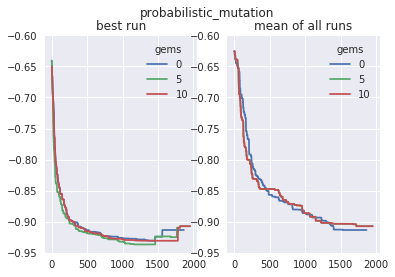

In [10]:
plot_fitnesses(data, 'probabilistic_mutation', (-0.95, -0.6))

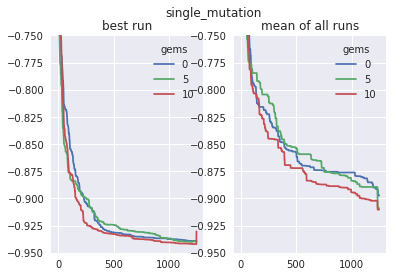

In [11]:
plot_fitnesses(data, 'single_mutation', (-0.95, -0.75))

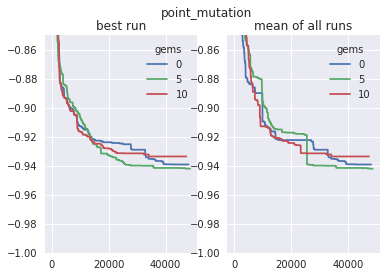

In [12]:
plot_fitnesses(data, 'point_mutation', (-1, -0.85))

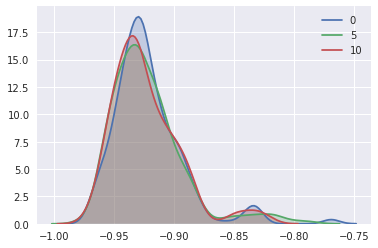

In [13]:
plot_distributions(folder, mutations)

# Conclusion

Gems were able to improve performance in almost all instances of experiment. Best performance overall was achieved by 